<a href="https://colab.research.google.com/github/lauracantik/dataminingg/blob/main/TugasPertemuan14_DML_Kelompok6_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/lauracantik/dataminingg/main/2-employee.csv")
dataset.head()

,Data,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,...,DOW of Joining,Short DOW,Age in Company (Years),Salary,Last % Hike,SSN,Phone No.,Province ID,User Name,Password
0,0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,...,Saturday,Sat,6.61,119090,17%,222-11-7603,702-771-7149,4,swbuck,ja8?k3BTF^]o@<&
1,1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,...,Tuesday,Tue,0.26,117991,14%,550-99-9897,231-765-6923,7,nzburke,tPA@4Wh9Ja$+Ln
2,1,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,...,Monday,Mon,0.34,161045,28%,215-91-0004,270-749-4774,25,ewfoster,5D.B4IGNkWJfG<~
3,0,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,...,Tuesday,Tue,14.43,142616,16%,534-71-1053,219-623-8216,31,bclancaster,I%?JDM
4,0,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,...,Tuesday,Tue,0.79,135706,11%,644-29-6396,907-677-8486,16,elpotter,j4jkEXfC&Rh


In [4]:
data_selection = dataset[['Age in Company (Years)', 'Age in Yrs.',
 'Salary', 'Data']]
data_rename_column = data_selection.rename(columns={
 'Age in Company (Years)':'lama_kerja','Age in Yrs.':'umur',
 'Salary':'gaji',
 'Data':'data'
})
data_rename_column.head()
print(data_rename_column)

    lama_kerja   umur    gaji  data
0         6.61  45.66  119090     0
1         0.26  23.76  117991     1
2         0.34  22.68  161045     1
3        14.43  41.70  142616     0
4         0.79  22.39  135706     0
5         2.67  25.81  173027     1
6        11.69  32.89   41287     0
7        17.78  59.15   85833     1
8        34.51  55.95  154216     1
9        11.30  35.84  133003     0
10        9.28  30.84  154836     0
11        0.30  28.54  124757     1
12        0.28  21.44   58733     1
13        0.71  22.08   75584     1
14       12.51  42.51  118693     1
15        6.17  27.48   98381     1
16        2.88  32.30  102274     0
17        2.15  30.12   91719     0
18       23.42  49.36  150016     0
19       12.75  45.21  125232     0
20        8.03  30.67  179264     1
21        0.86  46.47   68134     1
22       13.51  46.88  118621     1
23        7.85  41.12   85864     0
24       19.43  40.98   98030     1
25       22.98  57.02  149842     0
26        3.82  25.07   7947

In [5]:
#Extracting Independent and dependent Variable
x= data_rename_column.iloc[:, [0,2]].values
y= data_rename_column.iloc[:, 3].values
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
#Predicting the test set result
y_pred= classifier.predict(x_test)
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe


,Data Sebenarnya,Data Prediksi
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,0,1
7,1,1


In [6]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe

,Data Sebenarnya,Data Prediksi
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,0,1
7,1,1


In [7]:
y_pred_train = classifier.predict(x_train)
dataframe = pd.DataFrame({'Data Sebenarnya': y_train, 'Data Prediksi': y_pred_train})
dataframe

,Data Sebenarnya,Data Prediksi
0,0,0
1,1,1
2,1,1
3,0,0
4,1,0
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


[[2 1]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



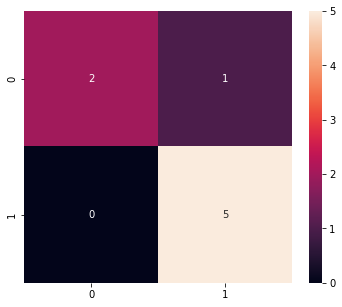

In [8]:
#Creating the Confusion matrix Test
#evaluation data
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
#ketepatan percentage
print(classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

[[8 3]
 [2 9]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.75      0.82      0.78        11

    accuracy                           0.77        22
   macro avg       0.78      0.77      0.77        22
weighted avg       0.78      0.77      0.77        22



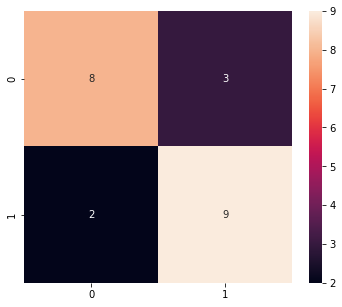

In [9]:
#Creating the Confusion matrix Train
#evaluation data
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_pred_train))
#ketepatan percentage
print(classification_report(y_train, y_pred_train))
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot = True)

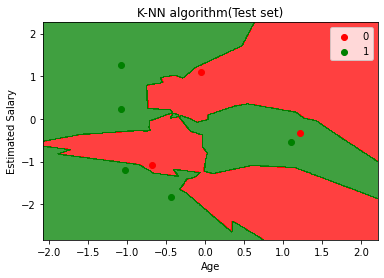

In [10]:
#Visualizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1,
step =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
 mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show() 


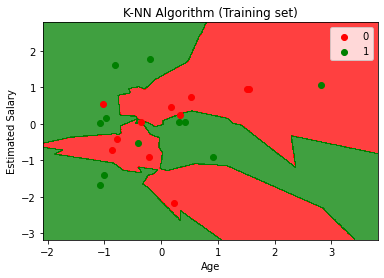

In [11]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train 
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1,
step =0.01), nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step =
0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
 mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show() 